### AWS - Auto ML
### Employee ID : 2113702
### Employee Name: Vinayak Mathur

# Importing Libraries

In [2]:
import boto3
from sagemaker import get_execution_role
import pandas as pd
import numpy as np
import io
from io import StringIO

# Getting the Data

In [3]:
bucket = 'aws-3700-bucket'
subfolder = 'files/'
resfolder = 'Results/'

In [4]:
#Get permission to read from S3 buckets
role = get_execution_role()

In [5]:
#creating a connection
conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
#listing files available in the bucket.
for f in contents:
    print(f['Key'])

files/201801-fordgobike-tripdata.csv
files/201802-fordgobike-tripdata.csv
files/201803-fordgobike-tripdata.csv
files/American_gangster.txt
files/Joseph.txt
files/Palazzo_colonna.txt
files/eucalyptus.txt
files/spotify00-19-1.csv
files/spotify00-19-2.csv
files/throttle.txt


# Combining Data

In [6]:
ldfs = []
for obj_key in ['files/201801-fordgobike-tripdata.csv', 'files/201802-fordgobike-tripdata.csv', 'files/201803-fordgobike-tripdata.csv']:
    csv_obj = conn.get_object(Bucket='aws-3700-bucket', Key=obj_key)
    body = csv_obj['Body']
    csv_string = body.read().decode('utf-8')
    df = pd.read_csv(StringIO(csv_string), sep = ',')
    ldfs.append(df)
df = pd.concat(ldfs)

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [8]:
df.shape

(312902, 14)

In [9]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

# Uploading Files to S3 Bucket

In [10]:
df.to_csv('lyft_autopilot_data.csv')
conn.upload_file('lyft_autopilot_data.csv', 'aws-3700-bucket','Results/lyft_data.csv')

# Spilting Data to train and test Data

In [11]:
train_data, test_data, _ = np.split(df.sample(frac=1, random_state=42), [int(0.95 * len(df)), int(len(df))])  

train_data.to_csv('lyft_train_data.csv', index=False, header=True, sep=',') 
test_data.to_csv('lyft_test_data.csv', index=False, header=True, sep=',')

conn.upload_file('lyft_train_data.csv', 'aws-3700-bucket','Input/lyft_train.csv')
conn.upload_file('lyft_test_data.csv', 'aws-3700-bucket','Input/lyft_test.csv')

In [12]:
train_data.shape

(297256, 14)

In [13]:
train_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
69690,432,2018-01-11 09:20:45.5740,2018-01-11 09:27:58.4050,215,34th St at Telegraph Ave,37.822547,-122.266318,181,Grand Ave at Webster St,37.811377,-122.265192,1932,Subscriber,No
22827,671,2018-03-27 08:10:49.1660,2018-03-27 08:22:00.2360,81,Berry St at 4th St,37.775880,-122.393170,16,Steuart St at Market St,37.794130,-122.394430,3374,Subscriber,No
5152,558,2018-03-30 13:48:35.1430,2018-03-30 13:57:53.1920,11,Davis St at Jackson St,37.797280,-122.398436,342,Colin P Kelly Jr St at Townsend St (Temporary ...,37.781383,-122.389841,1055,Subscriber,No
65823,707,2018-02-10 14:54:41.5610,2018-02-10 15:06:28.7490,14,Clay St at Battery St,37.795001,-122.399970,324,Union Square (Powell St at Post St),37.788300,-122.408531,3247,Customer,No
20665,1237,2018-01-26 10:03:18.1330,2018-01-26 10:23:55.3410,115,Jackson Playground,37.765026,-122.398773,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,1211,Subscriber,No


# Using Auto ML to Determine best Model

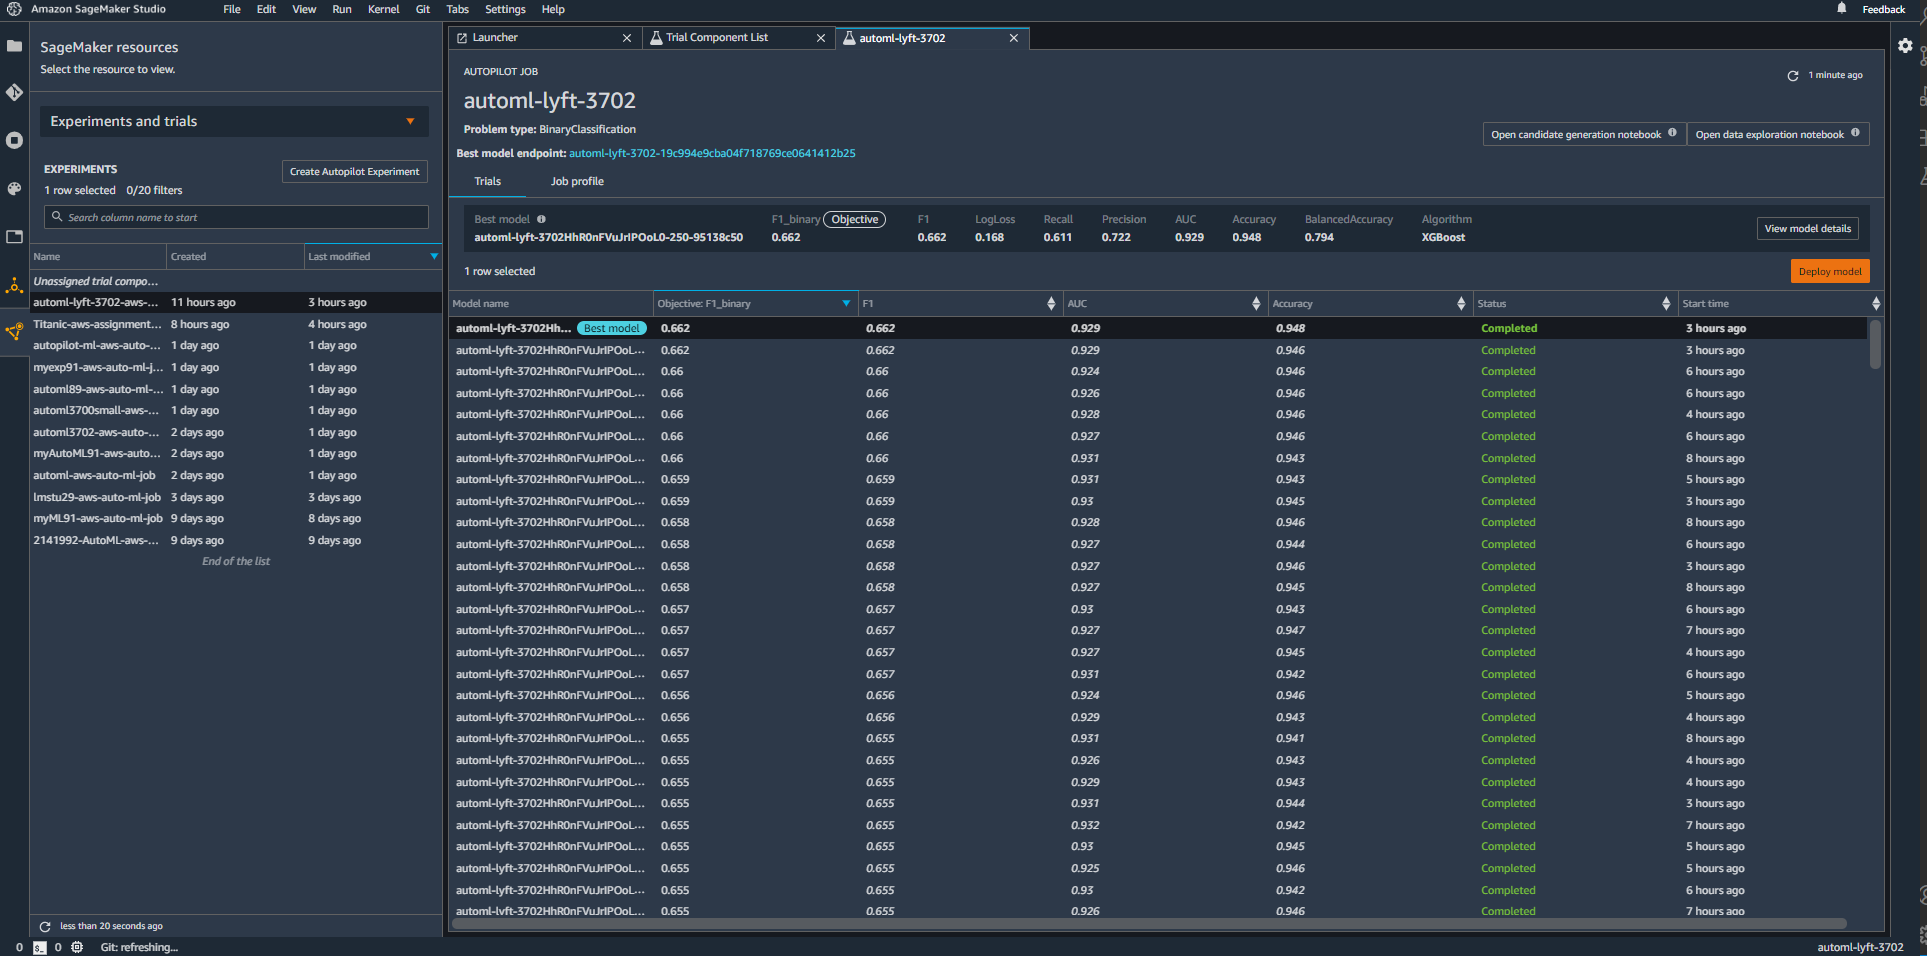

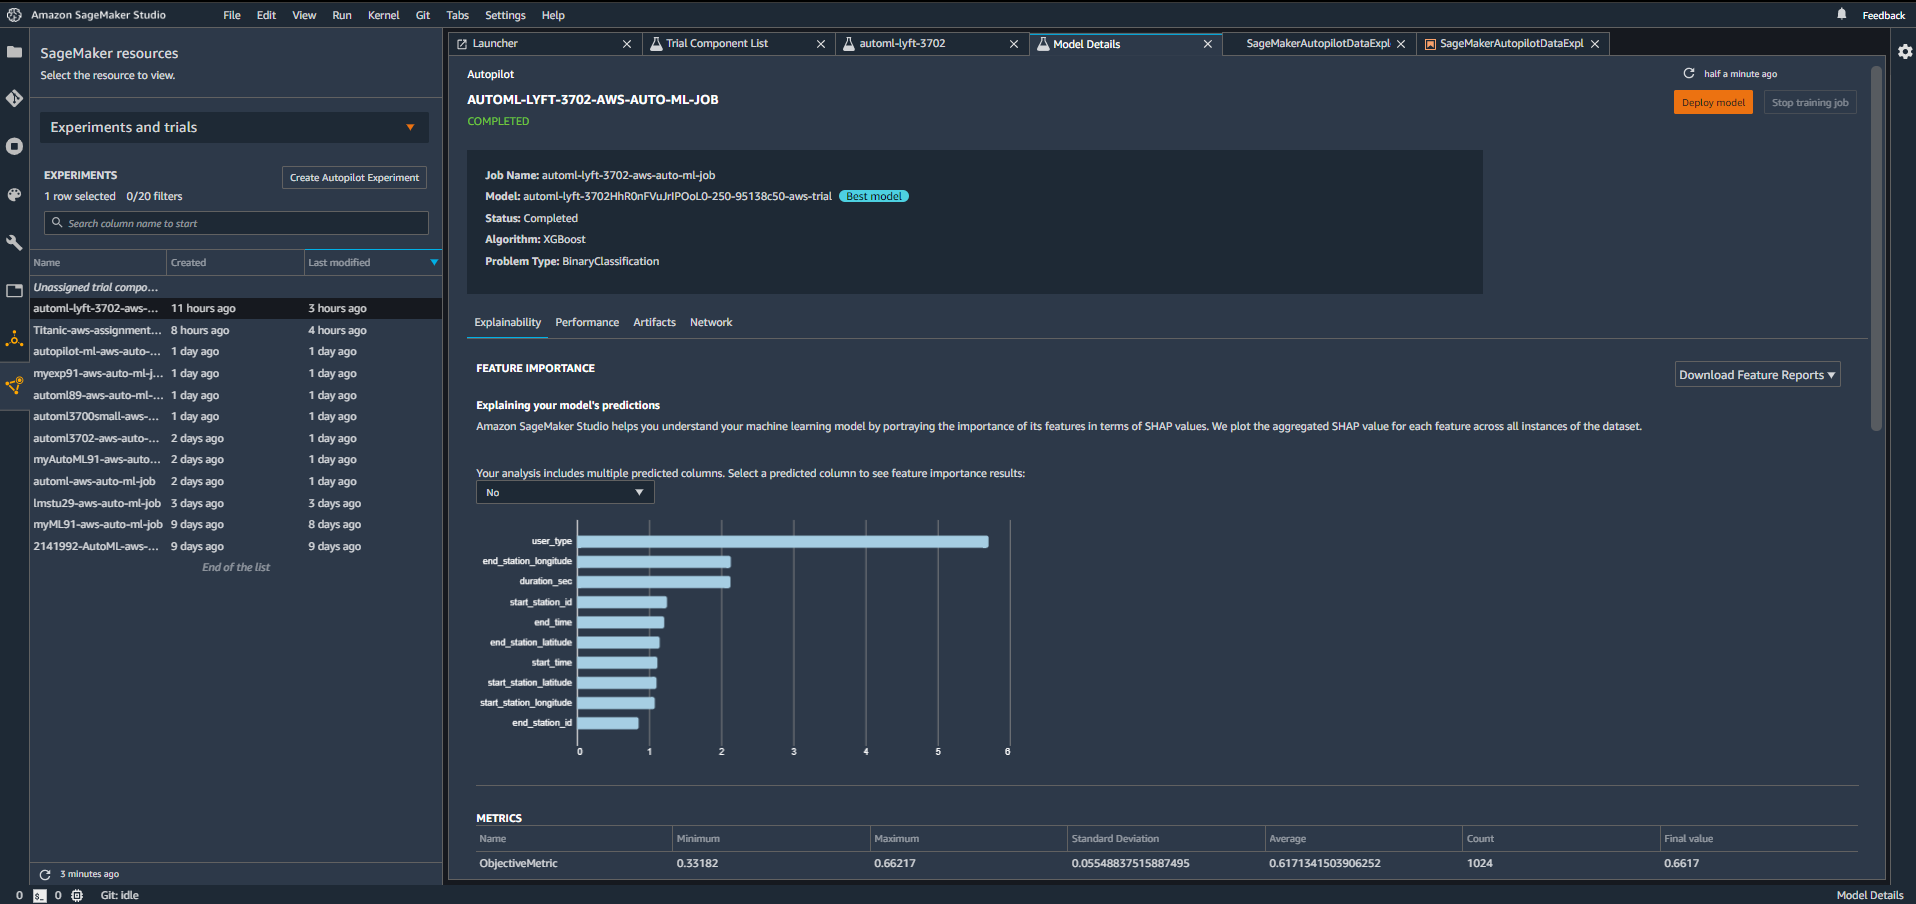

# Deploying the Best Model

### Endpoint for the best moddel:

In [2]:
endpoint_name = 'automl-lyft-3702-19c994e9cba04f718769ce0641412b25'

In [3]:
import sagemaker
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import CSVDeserializer
csv_serializer = CSVSerializer()
csv_deserializer = CSVDeserializer()
# Initialize the predictor
predictor = sagemaker.predictor.Predictor(endpoint_name=endpoint_name,
sagemaker_session=sagemaker.Session(),
serializer=csv_serializer,
deserializer=csv_deserializer
)

In [6]:
tp = tn = fp = fn = count = 0

with open('lyft_test_data.csv') as f:
    lines = f.readlines()
    for l in lines[1:]:   # Skip header
        l = l.split(',')  # Split CSV line into feature array
        label = str(l[-1])     # Store 'yes'/'no' label
        l = l[:-1]        # Remove label
        l = ','.join(l)   # Rebuild CSV line without label
                
        response_re = predictor.predict(l)
        response = response_re[0][0]
        #response = response.decode("utf-8")
        #print ("label %s response %s" %(label,response))
        #print(label, response)
        if 'Yes' in label:
            # Sample is positive
            if 'Yes' in response:
                # True positive
                tp=tp+1
            else:
                # False negative
                fn=fn+1
        else:
            # Sample is negative
            if 'No' in response:
                # True negative
                tn=tn+1
            else:
                # False positive
                fp=fp+1
        count = count+1
        #print(tn)
        #break
            
print ("Done")  


Done


In [8]:
#Confusion matrix
print ("%d %d" % (tn, fp))
print ("%d %d" % (fn, tp))

accuracy  = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall    = tn/(tp+fn)
f1        = (2*precision*recall)/(precision+recall)

print ("%.4f %.4f %.4f %.4f" % (accuracy, precision, recall, f1))

13911 350
502 883
0.9455 0.7161 10.0440 1.3370


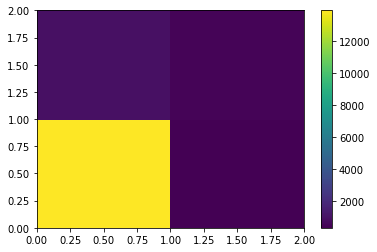

In [11]:
import matplotlib.pyplot as plt
import numpy as np

data = [[tp, fp],[fn, tn]]
heatmap = plt.pcolor(data)
plt.colorbar(heatmap)
plt.show()